In [1]:
from theano import *
from lasagne.layers import EmbeddingLayer, InputLayer, get_output
import lasagne
import lasagne.layers
import theano.tensor as T
import theano
import numpy as np

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
theano.__version__

'0.7.0.dev-36d1eca8ff1b1fb965896bd30e1952338e7e51c5'

In [23]:
l_in = lasagne.layers.InputLayer((10,50))

In [24]:
l_hidden = lasagne.layers.DenseLayer(l_in, num_units=10, name='dens1')

In [25]:
l_out = lasagne.layers.DenseLayer(l_hidden, num_units=1, name='dens2')

In [26]:
out = lasagne.layers.get_output(l_out)

In [27]:
print out

Elemwise{mul,no_inplace}.0


In [135]:
target = T.vector('y')
#loss = lasagne.objectives.binary_crossentropy(out, target).mean()
#loss_vec = (out.reshape((out.size,)) - target.astype('float32')) ** 2
loss_vec = lasagne.objectives.binary_crossentropy((out.reshape((out.size,)) + .01) / 1.2,target)

In [136]:
all_params = lasagne.layers.get_all_params(l_out)

In [137]:
update_adagrad = lasagne.updates.adagrad(loss_vec.mean(), all_params, .01, .9)
update = lasagne.updates.apply_momentum(update_adagrad)

In [138]:
train = theano.function(
    [l_in.input_var, target], loss_vec, updates=update,
    allow_input_downcast=True,
    mode='DebugMode',
)

In [114]:
loss_grad = T.grad(loss_vec.mean(), l_hidden.get_params()[0])

In [141]:
fun_loss = theano.function(
    [l_in.input_var, target], 
    (out, target, loss_vec, loss_vec.mean()),
    mode='DebugMode',
)
#fun_out = theano.function([l_in.input_var], out, mode='DebugMode', on_unused_input='warn')

In [142]:
fun_loss2 = theano.function(
    [l_in.input_var, target],
    (out, target, T.log(out + .01), out.max(), out.min(), loss_vec),
    mode='DebugMode',
)

In [87]:
target_v = (np.random.randint(0,2,10)).astype('float32') * .99 + .005

In [84]:
target_t = np.random.randn(10, 50)

In [88]:
target_v

array([ 0.005,  0.995,  0.995,  0.995,  0.005,  0.005,  0.995,  0.995,
        0.005,  0.005], dtype=float32)

In [143]:
fun_loss2(target_t, target_v)

[array([[ -4.16333634e-17],
        [ -4.16333634e-17],
        [  1.38777878e-17],
        [ -4.16333634e-17],
        [ -4.16333634e-17],
        [ -4.16333634e-17],
        [  6.93889390e-17],
        [ -4.16333634e-17],
        [ -4.16333634e-17],
        [ -4.16333634e-17]]),
 array([ 0.005,  0.995,  0.995,  0.995,  0.005,  0.005,  0.995,  0.995,
         0.005,  0.005]),
 array([[-4.60517019],
        [-4.60517019],
        [-4.60517019],
        [-4.60517019],
        [-4.60517019],
        [-4.60517019],
        [-4.60517019],
        [-4.60517019],
        [-4.60517019],
        [-4.60517019]]),
 array(6.938893903907228e-17),
 array(-4.163336342344337e-17),
 array([ 0.03226387,  4.76359615,  4.76359615,  4.76359615,  0.03226387,
         0.03226387,  4.76359615,  4.76359615,  0.03226387,  0.03226387])]

In [131]:
fun_loss(target_t, target_v)

[array([[  6.93889390e-18],
        [  0.00000000e+00],
        [  6.93889390e-18],
        [  6.93889390e-18],
        [  7.14751321e-01],
        [  6.93889390e-18],
        [  6.93889390e-18],
        [  6.93889390e-18],
        [  1.06281132e+00],
        [  4.69821347e-01]]),
 array([ 0.005,  0.995,  0.995,  0.995,  0.005,  0.005,  0.995,  0.995,
         0.005,  0.005]),
 array([ 0.03226387,  4.76359615,  4.76359615,  4.76359615,  0.92412868,
         0.03226387,  4.76359615,  4.76359615,  2.23374332,  0.51260795]),
 array(2.755298842539474)]

In [139]:
for i in xrange(500): train(target_t, target_v)

In [140]:
fun_loss(target_t, target_v)

[array([[ -4.16333634e-17],
        [ -4.16333634e-17],
        [  1.38777878e-17],
        [ -4.16333634e-17],
        [ -4.16333634e-17],
        [ -4.16333634e-17],
        [  6.93889390e-17],
        [ -4.16333634e-17],
        [ -4.16333634e-17],
        [ -4.16333634e-17]]),
 array([ 0.005,  0.995,  0.995,  0.995,  0.005,  0.005,  0.995,  0.995,
         0.005,  0.005]),
 array([ 0.03226387,  4.76359615,  4.76359615,  4.76359615,  0.03226387,
         0.03226387,  4.76359615,  4.76359615,  0.03226387,  0.03226387]),
 array(2.3979300073535463)]

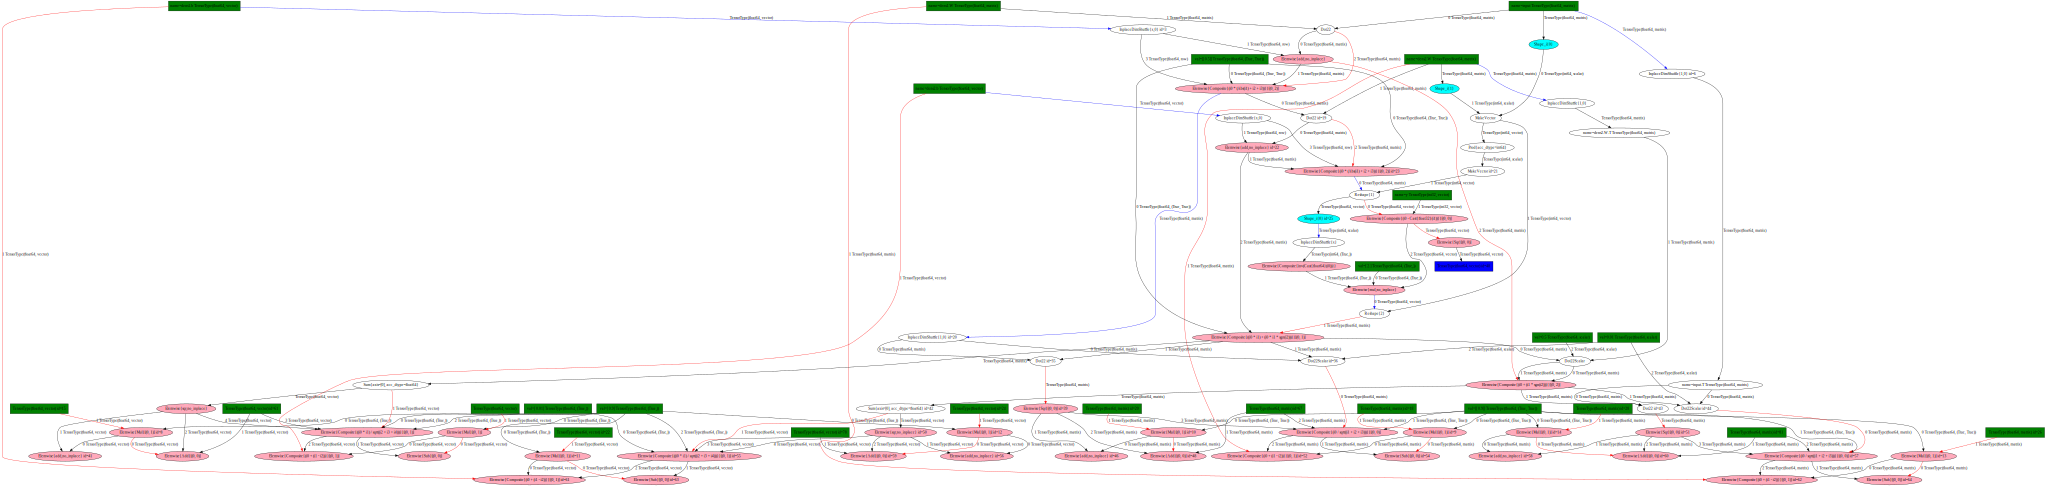

In [48]:
from IPython.display import SVG
SVG(theano.printing.pydotprint(train, return_image=True, format='svg'))

In [17]:
res_out, res_target

NameError: name 'res_out' is not defined

In [ ]:
res_out.shape, res_target.shape

In [ ]:
theano.printing.debugprint(fun_loss)

In [ ]:
target_t.shape

In [ ]:
train(target_t, target_v)

In [ ]:
eval_v = {l_in.input_var: target_t, target: target_v}
l_out.input_shape

In [ ]:
[(a.shape.eval(), a) for a in all_params]

In [ ]:
target_v.shape, target_t.shape

In [ ]:
target_t.dot(all_params[0].get_value()).dot(all_params[2].get_value()) > 0

In [ ]:
theano.printing.debugprint(train)

In [ ]:
theano.config.DebugMode.

In [ ]:
theano.__version__

In [ ]:
from IPython.display import Image
res = theano.printing.pydotprint(train, outfile="functions/train.png")
Image("functions/train.png")

In [ ]:
update_diff = [u[0] - u[1] for u in update]

In [ ]:
updates_func = theano.function((l_in.input_var, target), update.values(), updates=update.items())

In [ ]:
update.items()

In [ ]:
update.items()[0][0]

In [ ]:
theano.printing.pydotprint(updates_func, outfile="functions/return_update_values.png")

In [ ]:
updates_func(target_t, target_v)[3]

In [ ]:
qwe = update.items()

In [ ]:
qwe.get_value()